#לא להריץ שוב יותר!!!!!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/"

'BINA PROJECT'			       'אפיון בסיסי נתונים אנדו קיור.gdoc'
'Colab Notebooks'		       'בינה מלאכותית הרצאה 3.gdoc'
'DATA SCIENCE PROJECT 1 Ori Mor.gdoc'  'היבטים פסיכולוגיים של מצבי נכות וחולי סיכום.gdoc'
'ERD LORI MED.drawio'		       'היבטים פסיכולוגיים של מצבי נכות וחולי סיכום.pdf'
 ex1DATAbase.drawio		       'היבטים של פסיכולוגיה בחולי ונכות 2 תמלול וסיכום.gdoc'
 hachomer_hatorashti.doc	       'הרצאה 2 פיזיולוגיה תמלול וסיכום.gdoc'
 IMG_4742.jpg			       'מילון מושגים ביוכימיה 1.pdf'
'indian Worker'			       'מילון מושגים כימיה אורגנית ב.pdf'
'LORIMED EX2.drawio'		       'מילון פקודות פייתון.gdoc'
 Notability			       'מילון פקודות פייתון.pdf'
'Notability (1)'		       'מסמך ללא שם.gdoc'
'Notability (2)'		       'סיכום .docx'
'Notability (3)'		       'שנה ב בוקר סמסטר א.gdoc'
'Notability (4)'		       'שנה ב בוקר סמסטר א.pdf'
'Notability (5)'		       'תובנות SweetViz.gdoc'
'Notability (6)'		       'תוכנית פריסה.xlsx'


In [ ]:
!ls "/content/drive/MyDrive/BINA PROJECT/indian Worker/indianWorker"


light  severe  split_data_cnn  split_data_resnet50


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os
import matplotlib.pyplot as plt
import random
import shutil
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import backend as K
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
# ======================
# 1) הגדרת נתיבים
# ======================
source_dir_light   = "//content/drive/MyDrive/BINA PROJECT/indian Worker/indianWorker/light"   # נתיב לתמונות מצב 'קל'
source_dir_severe  = "/content/drive/MyDrive/BINA PROJECT/indian Worker/indianWorker/severe"  # נתיב לתמונות מצב 'חמור'
split_data_dir     = "/content/drive/MyDrive/BINA PROJECT/indian Worker/indianWorker/split_data_resnet50"  # התיקייה החדשה לחלוקה

# אחוזי חלוקה
test_split = 0.1
val_split  = 0.1

In [ ]:
# 2) פונקציה לפיצול תמונות
#הפונקציה מפצלת את קבצי התמונות לתת־תיקיות (train/val/test) בהתאם לאחוזים שהוגדרו, ומעתיקה אותן ליעד המתאים תחת קטגוריה מסוימת.
def split_data(source_dir, output_dir, category, test_ratio, val_ratio):
    """
    מעתיקה את התמונות מתוך source_dir
    ומפצלת אותן ל-train/val/test תחת output_dir,
    בתיקיית משנה בשם 'category' (light/severe).
    """
    files = os.listdir(source_dir)
    random.shuffle(files)

    total_files = len(files)
    test_size = int(total_files * test_ratio)
    val_size  = int(total_files * val_ratio)

    test_files  = files[:test_size]
    val_files   = files[test_size : test_size + val_size]
    train_files = files[test_size + val_size :]

    for split_name, split_list in zip(["train", "val", "test"],
                                      [train_files, val_files, test_files]):
        split_category_dir = os.path.join(output_dir, split_name, category)
        os.makedirs(split_category_dir, exist_ok=True)

        for f in split_list:
            src = os.path.join(source_dir, f)
            dst = os.path.join(split_category_dir, f)
            shutil.copy(src, dst)



In [ ]:
# ============================================
# 3) פיצול לשתי הקטגוריות (light, severe)
# ============================================
split_data(source_dir_light,  split_data_dir, "light",  test_split, val_split)
split_data(source_dir_severe, split_data_dir, "severe", test_split, val_split)

In [ ]:
# =====================================
# 4) הגדרת פרמטרים לטעינת ה-Dataset
# =====================================
IMG_SIZE   = (224, 224)
BATCH_SIZE = 32
SEED       = 123

train_dir = os.path.join(split_data_dir, "train")
val_dir   = os.path.join(split_data_dir, "val")
test_dir  = os.path.join(split_data_dir, "test")



In [ ]:
# ==========================
# 5) טעינת ה-Datasets
# ==========================
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='binary',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='binary',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='binary',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds   = val_ds.prefetch(AUTOTUNE)
test_ds  = test_ds.prefetch(AUTOTUNE)

Found 802 files belonging to 2 classes.
Found 99 files belonging to 2 classes.
Found 99 files belonging to 2 classes.


In [ ]:
# 6) Data Augmentation מצומצם מותאם לתמונות רפואיות
# =================================================
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.05),       # רוטציה קטנה
    layers.RandomZoom(0.1),           # זום קטן
    layers.RandomContrast(0.05),       # שינוי קל בניגודיות
], name="augmentation_layer")



In [ ]:
# 7) Preprocessing
# ======================
def augment_and_preprocess(image, label):
    image = data_augmentation(image)
    image = preprocess_input(image)  # ResNet50 preprocess
    return image, label

def preprocess_only(image, label):
    image = preprocess_input(image)
    return image, label

train_ds = train_ds.map(augment_and_preprocess, num_parallel_calls=AUTOTUNE)
val_ds   = val_ds.map(preprocess_only,         num_parallel_calls=AUTOTUNE)
test_ds  = test_ds.map(preprocess_only,        num_parallel_calls=AUTOTUNE)

In [ ]:
# 8) הגדרת פונקציית F1 (Binary)
# ======================================
from tensorflow.keras import backend as K
def f1_score(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.round(y_true * y_pred))
    predicted_positives = K.sum(K.round(y_pred))
    possible_positives  = K.sum(K.round(y_true))
    precision = tp / (predicted_positives + K.epsilon())
    recall    = tp / (possible_positives + K.epsilon())
    return 2 * (precision * recall) / (precision + recall + K.epsilon())



In [ ]:
# 9) בניית מודל בסיס: ResNet50
# ==========================
base_model = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=IMG_SIZE + (3,)     #גודל הקלט (224x224x3)
)
base_model.trainable = False  # הקפאה בשלב ראשון

#  הוספת "ראש" חדש למודל
inputs = layers.Input(shape=IMG_SIZE + (3,))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)  # הפחתנו ל-0.2
outputs = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(inputs, outputs, name="Light_vs_Severe_ResNet50")



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 10) קומפילציה ואימון ראשוני (Freeze)
# =======================================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        f1_score
    ]
)

model.summary()
# משקולות לקטגוריות (אם 'severe' חסרה, לדוגמה)
class_weights = {0:1.0, 1:2.0}

EPOCHS = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    class_weight=class_weights
)



Model: "Light_vs_Severe_ResNet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 204s 7s/step - accuracy: 0.5070 - f1_score: 0.6227 - loss: 1.0689 - precision: 0.5205 - recall: 0.7897 - val_accuracy: 0.6162 - val_f1_score: 0.6784 - val_loss: 0.6481 - val_precision: 0.5843 - val_recall: 0.9811
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 195s 7s/step - accuracy: 0.6149 - f1_score: 0.6763 - loss: 0.8952 - precision: 0.5831 - recall: 0.8163 - val_accuracy: 0.7071 - val_f1_score: 0.8311 - val_loss: 0.5489 - val_precision: 0.6500 - val_recall: 0.9811
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 203s 8s/step - accuracy: 0.6813 - f1_score: 0.7411 - loss: 0.7916 - precision: 0.6264 - recall: 0.9278 - val_accuracy: 0.7172 - val_f1_score: 0.7576 - val_loss: 0.5483 - val_precision: 0.6582 - val_recall: 0.9811
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 249s 7s/step - accuracy: 0.6882 - f1_score: 0.7554 - loss: 0.7499 - precision: 0.6416 - recall: 0.9279 - val_accuracy: 0.7677 - val_f1_score: 0.8463 - val_loss: 0.4690 - val_precision: 0.7419 - val_recall: 0.8

In [ ]:
# 11) Fine-Tuning
# =========================
for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        f1_score
    ]
)

FINE_TUNE_EPOCHS = 10
history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=FINE_TUNE_EPOCHS
)



Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 252s 9s/step - accuracy: 0.7711 - f1_score: 0.7883 - loss: 0.4593 - precision: 0.7792 - recall: 0.8030 - val_accuracy: 0.7980 - val_f1_score: 0.7661 - val_loss: 0.4059 - val_precision: 0.8667 - val_recall: 0.7358
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 234s 9s/step - accuracy: 0.7724 - f1_score: 0.7729 - loss: 0.4466 - precision: 0.7366 - recall: 0.8379 - val_accuracy: 0.7879 - val_f1_score: 0.8340 - val_loss: 0.4013 - val_precision: 0.8636 - val_recall: 0.7170
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 261s 9s/step - accuracy: 0.7969 - f1_score: 0.8044 - loss: 0.4389 - precision: 0.7902 - recall: 0.8360 - val_accuracy: 0.8081 - val_f1_score: 0.8439 - val_loss: 0.3883 - val_precision: 0.8696 - val_recall: 0.7547
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 257s 10s/step - accuracy: 0.8121 - f1_score: 0.8181 - loss: 0.4178 - precision: 0.7973 - recall: 0.8479 - val_accuracy: 0.8182 - val_f1_score: 0.8135 - val_loss: 0.3836 - val_precision: 0.8889 - val_recall: 0.

In [ ]:
# לאחר שהסתיים האימון בפיין-טיונינג (history_fine),
# מריצים הערכה חדשה על ה-Test Data כדי לבדוק ביצועים סופיים:
print("\nEvaluating Fine-Tuned Model on Test Data...")
test_loss, test_acc, test_prec, test_rec, test_f1 = model.evaluate(test_ds)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall: {test_rec:.4f}")
print(f"Test F1: {test_f1:.4f}")



Evaluating Fine-Tuned Model on Test Data...
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.7038 - f1_score: 0.4136 - loss: 0.6254 - precision: 0.5242 - recall: 0.5486
Test Loss: 0.6217
Test Accuracy: 0.6970
Test Precision: 0.7255
Test Recall: 0.6981
Test F1: 0.6204


In [ ]:
# 13) Confusion Matrix ו-Classification Report
# =========================
y_true = []
y_pred = []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy().flatten())
    y_pred.extend((preds.flatten() > 0.5).astype(int))

cm = confusion_matrix(y_Atrue, y_pred)
report = classification_report(y_true, y_pred, target_names=["Light (0)", "Severe (1)"])

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)



1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Confusion Matrix:
 [[32 14]
 [16 37]]

Classification Report:
               precision    recall  f1-score   support

   Light (0)       0.67      0.70      0.68        46
  Severe (1)       0.73      0.70      0.71        53

    accuracy                           0.70        99
   macro avg       0.70      0.70      0.70        99
weighted avg       0.70      0.70      0.70        99



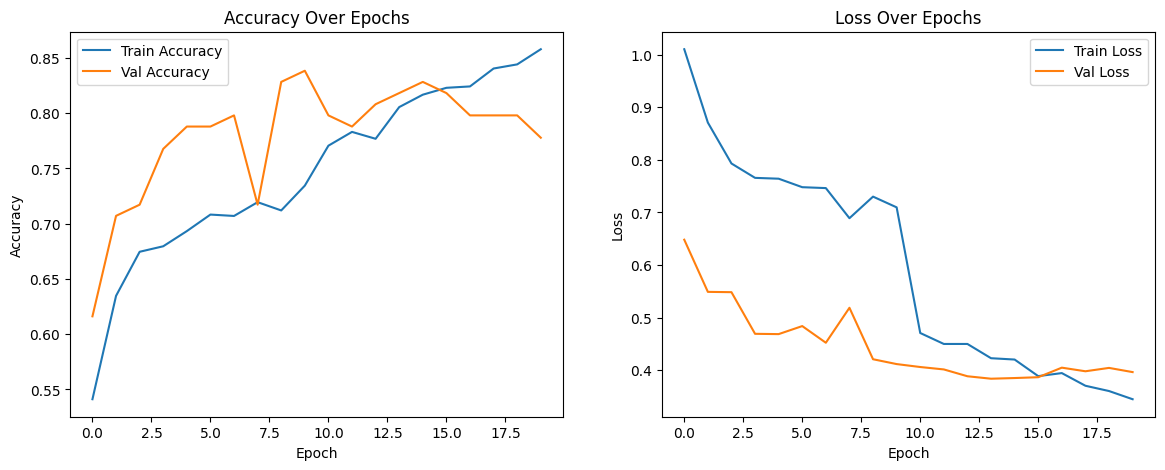

In [ ]:
# 14) גרפים (Loss ו-Accuracy)
# =========================
acc      = history.history["accuracy"] + history_fine.history["accuracy"]
val_acc  = history.history["val_accuracy"] + history_fine.history["val_accuracy"]
loss     = history.history["loss"] + history_fine.history["loss"]
val_loss = history.history["val_loss"] + history_fine.history["val_loss"]

epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

# גרף Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train Accuracy")
plt.plot(epochs_range, val_acc, label="Val Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# גרף Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Val Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()